### Importing basic libraries

In [22]:
import os
import zipfile
import pathlib

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

### Importing Data

In [5]:
#extracting the data
zip=zipfile.ZipFile("/content/pizza_steak.zip","r")
zip.extractall()
zip.close()

### Exploring the data

In [11]:
# getting path, folder, file names
for dirpath,dirname,filename in os.walk("/content/pizza_steak"):
  print(f"{len(filename)} in  {dirpath}")

0 in  /content/pizza_steak
0 in  /content/pizza_steak/train
750 in  /content/pizza_steak/train/steak
750 in  /content/pizza_steak/train/pizza
0 in  /content/pizza_steak/test
250 in  /content/pizza_steak/test/steak
250 in  /content/pizza_steak/test/pizza


There are totally 1000 images each inside pizza and steak folder.

Among 1000, 750 are used for training and 250 for testing.

In [13]:
#Class names- just confirming the classes in the data

dir=pathlib.Path("/content/pizza_steak/train")
class_names=np.array([item.name for item in dir.glob("*")])

#np.array([item.name for item in dir.iterdir()]) can also use this

In [14]:
class_names

array(['steak', 'pizza'], dtype='<U5')

### Visualize the data

(512, 512, 3)
(382, 512, 3)


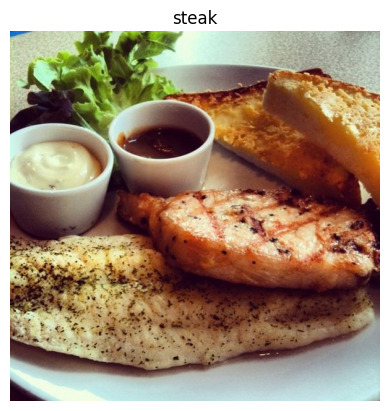

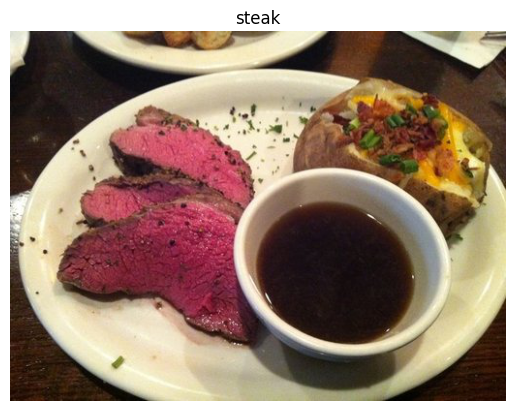

In [33]:
for i in np.random.choice(os.listdir("/content/pizza_steak/train/steak"),2):
  pic=img.imread("/content/pizza_steak/train/steak"+"/"+i)
  plt.figure()
  plt.imshow(pic)
  plt.title("steak")
  plt.axis("off")
  print(pic.shape)

(306, 512, 3)
(512, 384, 3)


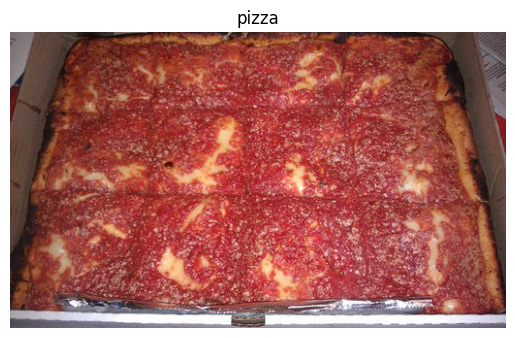

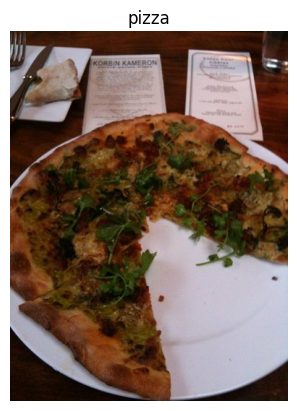

In [32]:
for i in np.random.choice(os.listdir("/content/pizza_steak/train/pizza"),2):
  pic=img.imread("/content/pizza_steak/train/pizza"+"/"+i)
  plt.figure()
  plt.imshow(pic)
  plt.title("pizza")
  plt.axis("off")
  print(pic.shape)

The images of steak and pizza are not in same same shape.

And also the images within steak and within pizza are also not in same shape.

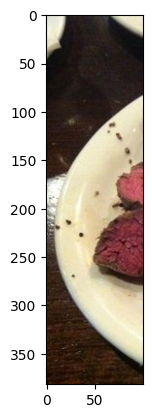

In [37]:
plt.imshow(pic[:,0:100,:])# height, width,channel

### Image preprocessing

1. Converting image to numbers.
2. Making all aimages to same shape.
3. Scaling the values of pixel

In [38]:
# importing required libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [39]:
# creating imagedatagenerator instance with rescaling
train_data_scale=ImageDataGenerator(rescale=1/255)
test_data_scale=ImageDataGenerator(rescale=1/255)

In [40]:
#preprocessing image for model

train_data=train_data_scale.flow_from_directory("/content/pizza_steak/train/",
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode="binary")

test_data=train_data_scale.flow_from_directory("/content/pizza_steak/test/",
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode="binary")

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


### Model Building

In [51]:
# Baseline model
baseline_model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [52]:
baseline_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 150528)            0         
                                                                 
 dense_5 (Dense)             (None, 10)                1505290   
                                                                 
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,505,411
Trainable params: 1,505,411
Non-trainable params: 0
_________________________________________________________________


In [53]:
# compiling the model
baseline_model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [54]:
# fitting the model
history_baseline= baseline_model.fit(train_data,
                        epochs=5,
                        validation_data=test_data,
                        )

Epoch 1/5
47/47 [==============================] - 18s 368ms/step - loss: 0.7458 - accuracy: 0.4947 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 17s 368ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 17s 365ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 21s 439ms/step - loss: 0.6932 - accuracy: 0.4920 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 16s 346ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [42]:
#Building the model
model= tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="same"),
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="same"),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 55, 55, 10)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 53, 53, 10)        910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 26, 10)      

In [43]:
# compiling the model
model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [45]:
# fitting the model
history= model.fit(train_data,
                        epochs=5,
                        validation_data=test_data,
                        )

Epoch 1/5
47/47 [==============================] - 70s 1s/step - loss: 0.6830 - accuracy: 0.5733 - val_loss: 0.6115 - val_accuracy: 0.7200
Epoch 2/5
47/47 [==============================] - 68s 1s/step - loss: 0.5306 - accuracy: 0.7487 - val_loss: 0.4049 - val_accuracy: 0.8180
Epoch 3/5
47/47 [==============================] - 66s 1s/step - loss: 0.4513 - accuracy: 0.7927 - val_loss: 0.3688 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 67s 1s/step - loss: 0.4277 - accuracy: 0.8060 - val_loss: 0.3859 - val_accuracy: 0.8160
Epoch 5/5
47/47 [==============================] - 64s 1s/step - loss: 0.4074 - accuracy: 0.8213 - val_loss: 0.3661 - val_accuracy: 0.8560


### Comparison between dnn and cnn model

####Memory:

Number of parameters to train in DNN =1,505,411
<br>Number of parameters to train in CNN =4451

####Time:

Time taken to train DNN = 20s/epoch
<br>Time taken to train DNN = 67s/epoch

####Accuracy:

DNN= 50%
<br>CNN=85%